In [1]:
import pandas as pd

In [2]:
inFilePath = r'C:\Users\Nature\Desktop\STUDY\Programming\Works\Programming-In-Learning-Bioinformatics-ZeFengZhu\M_Probability&Statistics\ModernStatistics\data\exercise1-data.txt'

dfrm = pd.read_csv(inFilePath, sep='\t')

In [3]:
dfrm

,Class.ID,Class.name,Subclass.name,Female.count,Male.count
0,0,按性别统计,总人数,20,9
1,1,事业方面,付出回报,9,5
2,1,事业方面,工作环境,10,5
3,1,事业方面,工作收入,19,9
4,1,事业方面,工作内容,10,5
5,2,个人能力方面,适应能力,3,0
6,2,个人能力方面,应变能力,1,0
7,2,个人能力方面,人际交往,8,1
8,2,个人能力方面,学业,1,2
9,2,个人能力方面,心理健康,2,0


In [27]:
for name,data in dfrm.groupby(['Class.name']):
    print(name,'\n',data)

个人能力方面 
    Class.ID Class.name Subclass.name  Female.count  Male.count  all.count
5         2     个人能力方面          适应能力             3           0          3
6         2     个人能力方面          应变能力             1           0          1
7         2     个人能力方面          人际交往             8           1          9
8         2     个人能力方面            学业             1           2          3
9         2     个人能力方面          心理健康             2           0          2
事业方面 
    Class.ID Class.name Subclass.name  Female.count  Male.count  all.count
1         1       事业方面          付出回报             9           5         14
2         1       事业方面          工作环境            10           5         15
3         1       事业方面          工作收入            19           9         28
4         1       事业方面          工作内容            10           5         15
家庭方面 
     Class.ID Class.name Subclass.name  Female.count  Male.count  all.count
10         3       家庭方面          家庭状况             6           4         10
11         3 

>分别计算 5 大类中所有子栏目的比例均值和标准差。如上图所示，事业方面包括 5个子栏目，根据者 5 个子栏目的统计数据(count)，利用 R 语言环境下的相关函数计算其均值和标准差

In [31]:
from collections import defaultdict
info_dict = defaultdict(list)

In [48]:
data_col = ['Female.count', 'Male.count']
allma = dfrm.loc[0, data_col[1]]
allfe = dfrm.loc[0, data_col[0]]
info_dict = defaultdict(list)
for groupName, groupData in dfrm.loc[1:,].groupby(['Class.name']):
    se1 = groupData[data_col].mean()
    se2 = groupData[data_col].std()
    info_dict['Class.name'].append(groupName)
    info_dict['fe_%mean'].append(se1[data_col[0]]/allfe)
    info_dict['fe_std'].append(se2[data_col[0]])
    info_dict['ma_%mean'].append(se1[data_col[1]]/allma)
    info_dict['ma_std'].append(se2[data_col[1]])
pd.DataFrame(info_dict)

,Class.name,fe_%mean,fe_std,ma_%mean,ma_std
0,个人能力方面,0.150000,2.915476,0.066667,0.894427
1,事业方面,0.600000,4.690416,0.666667,2.000000
2,家庭方面,0.416667,2.065591,0.351852,1.329160
3,生活消费方面,0.625000,1.760682,0.722222,0.547723
4,社会方面,0.460000,4.549725,0.311111,1.303840


> 所有人共同最关心的前10个指标 不分性别，混合统计，根据给定的数据表，筛选所有人均最关心的前 10 个指标 (Subclass)。

In [7]:
dfrm['all.count'] = dfrm[data_col[0]] + dfrm[data_col[1]]

In [8]:
dfrm.sort_values(['all.count'], ascending=False).reset_index(drop=True).loc[1:11, ['Subclass.name', 'all.count']]

,Subclass.name,all.count
1,工作收入,28
2,家庭物质生活,21
3,行,20
4,住,20
5,食,19
6,衣,19
7,社会环境,18
8,工作环境,15
9,工作内容,15
10,生态环境,15


In [28]:
feFocus_df = dfrm.sort_values(['Female.count'],
                              ascending=False).reset_index(drop=True).loc[1:11, ['Subclass.name', 'Female.count']]
feFocus_df

,Subclass.name,Female.count
1,工作收入,19
2,家庭物质生活,14
3,社会环境,14
4,行,13
5,住,13
6,食,13
7,衣,13
8,生态环境,12
9,社会福利,11
10,家庭关系,11


In [29]:
maFocus_df = dfrm.sort_values(['Male.count'],
                              ascending=False).reset_index(drop=True).loc[1:11, ['Subclass.name', 'Male.count']]
maFocus_df

,Subclass.name,Male.count
1,工作收入,9
2,家庭物质生活,7
3,住,7
4,行,7
5,食,6
6,娱乐休闲等,6
7,衣,6
8,自身健康,5
9,付出回报,5
10,工作内容,5


In [30]:
union_df = pd.merge(feFocus_df, maFocus_df, how='outer')
union_df

,Subclass.name,Female.count,Male.count
0,工作收入,19.0,9.0
1,家庭物质生活,14.0,7.0
2,社会环境,14.0,NaN
3,行,13.0,7.0
4,住,13.0,7.0
5,食,13.0,6.0
6,衣,13.0,6.0
7,生态环境,12.0,NaN
8,社会福利,11.0,NaN
9,家庭关系,11.0,NaN


In [12]:
commonFocus_df = pd.merge(feFocus_df, maFocus_df, how='inner')
commonFocus_df

,Subclass.name,Female.count,Male.count
0,工作收入,19,9
1,家庭物质生活,14,7
2,行,13,7
3,住,13,7
4,食,13,6
5,衣,13,6


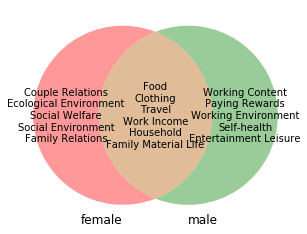

In [65]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

colNameDi = {'夫妻关系':'Couple Relations', 
             '社会福利':'Social Welfare', 
             '社会环境':'Social Environment', 
             '生态环境':'Ecological Environment', 
             '家庭关系':'Family Relations',
             '衣':'Clothing',
             '工作收入':'Work Income',
             '行':'Travel',
             '家庭物质生活':'Family Material Life',
             '住':'Household',
             '食': 'Food',
             '自身健康':'Self-health',
             '工作内容':'Working Content',
             '付出回报':'Paying Rewards',
             '工作环境':'Working Environment',
             '娱乐休闲等':'Entertainment Leisure',
            }

A = set([colNameDi[i] for i in feFocus_df['Subclass.name']])
B = set([colNameDi[i] for i in maFocus_df['Subclass.name']])

v = venn2(subsets=[A, B], set_labels=('female', 'male'))

v.get_label_by_id('10').set_text('\n'.join(A-B))
v.get_label_by_id('11').set_text('\n'.join(A&B))
v.get_label_by_id('01').set_text('\n'.join(B-A))

In [50]:
help(v)

Help on VennDiagram in module matplotlib_venn._common object:

class VennDiagram(builtins.object)
 |  A container for a set of patches and patch labels and set labels, which make up the rendered venn diagram.
 |  This object is returned by a venn2 or venn3 function call.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, patches, subset_labels, set_labels, centers, radii)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  get_circle_center(self, id)
 |      Returns the coordinates of the center of a circle as a numpy array (x,y)
 |      id must be 0, 1 or 2 (corresponding to the first, second, or third circle). 
 |      This is a getter-only (i.e. changing this value does not affect the diagram)
 |  
 |  get_circle_radius(self, id)
 |      Returns the radius of circle id (where id is 0, 1 or 2).
 |      This is a getter-only (i.e. changing this value does not affect the diagram)
 |  
 |  get_label_by_id(self, id)
 |      Returns a subset label by a "reg

In [ ]:
plt.annotate(',\n'.join(B-A-C), xy=v.get_label_by_id('010').get_position() +
             np.array([0, 0.2]), xytext=(-20,40), ha='center',
             textcoords='offset points', 
             bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->',              
                             connectionstyle='arc',color='gray'))

### 贝叶斯公式的简单应用
将性别中,男性记为 A，女性记为~A;分析栏目中只考虑事业和家庭两大类，并将 事业和家庭记为 B 和~B。则本次分析案例中: 
* $P(男)=P(A)= $
* $P(女)=P(-A)= $
* $P(事业)=P(B)= $
* $P(家庭)=P(-B)= $
* $P(事业|男)=P(B|A) = mp1/(mp1+mp3)=$
* $P(家庭|男)=P(-B|A) = mp3/(mp1+mp3)=$
* $P(事业|女)=P(B|-A) = fp1/(fp1+fp3) =$
* $P(家庭|女)=P(-B|-A)=fp3/(fp1+fp3) =$

计算不同性别的人在日常工作生活中，面临事业和家庭的选择时，选择事业的男性概率$P(男|事业)$是多少?选择家庭的女性概率$P(女|家庭)$是多少? 

In [17]:
ana_df = dfrm[dfrm['Class.name'].isin(['事业方面','家庭方面'])].copy()
name_di = {'事业方面': 'B', '家庭方面': '~B'}

In [18]:
ana_df['Class.name'] = ana_df.apply(lambda x: name_di[x['Class.name']], axis=1)
ana_df

,Class.ID,Class.name,Subclass.name,Female.count,Male.count,all.count
1,1,B,付出回报,9,5,14
2,1,B,工作环境,10,5,15
3,1,B,工作收入,19,9,28
4,1,B,工作内容,10,5,15
10,3,~B,家庭状况,6,4,10
11,3,~B,自身健康,9,5,14
12,3,~B,家人健康,8,4,12
13,3,~B,家庭关系,11,2,13
14,3,~B,夫妻关系,10,2,12
15,3,~B,教育程度,6,2,8


In [19]:
ana_all_num = ana_df['all.count'].sum()
pa = ana_df['Female.count'].sum()/ana_all_num
n_pa = ana_df['Male.count'].sum()/ana_all_num
pa, n_pa

(0.6950354609929078, 0.3049645390070922)

In [20]:
pb = ana_df[ana_df['Class.name'] == 'B']['all.count'].sum()/ana_all_num
n_pb = ana_df[ana_df['Class.name'] != 'B']['all.count'].sum()/ana_all_num
pb, n_pb

(0.5106382978723404, 0.48936170212765956)

In [67]:
# 𝑃(𝐵|𝐴) = 𝑚𝑝1/(𝑚𝑝1+𝑚𝑝3)
# pab = 
# pb_a = pab/pa
pb_a = ana_df[ana_df['Class.name'] == 'B']['Male.count'].sum()/ana_df['Male.count'].sum()

pab = ana_df[ana_df['Class.name'] == 'B']['Male.count'].sum()/ana_df['all.count'].sum()

ideal_pb_a = pab/0.5

pb_a,pab/pa,ideal_pb_a

(0.5581395348837209, 0.24489795918367346, 0.3404255319148936)

In [22]:
pnb_a = ana_df[ana_df['Class.name'] != 'B']['Male.count'].sum()/ana_df['Male.count'].sum()
pnb_a

0.4418604651162791

In [23]:
pb_na = ana_df[ana_df['Class.name'] == 'B']['Female.count'].sum()/ana_df['Female.count'].sum()
pnb_na = ana_df[ana_df['Class.name'] != 'B']['Female.count'].sum()/ana_df['Female.count'].sum()
pb_na,pnb_na

(0.4897959183673469, 0.5102040816326531)

In [24]:
# 𝑃(男|事业) 是多少?选择家庭的女性概率 𝑃(女|家庭)s?
pa_b = ana_df[ana_df['Class.name'] == 'B']['Male.count'].sum()/ana_df[ana_df['Class.name'] == 'B']['all.count'].sum()
pna_nb = ana_df[ana_df['Class.name'] != 'B']['Female.count'].sum()/ana_df[ana_df['Class.name'] != 'B']['all.count'].sum()
pa_b, pna_nb

(0.3333333333333333, 0.7246376811594203)